In [10]:
import pandas as pan
import numpy as num
import random
%matplotlib inline
import matplotlib.pyplot as mat

In [11]:
def read():
    arr1 = num.loadtxt('influencers.csv', dtype='float', delimiter=',')
    return arr1

arr = read()
print (arr)

[[1.0000e+00 6.2070e+03 1.0000e+00]
 [2.0000e+00 3.8237e+04 5.8000e+00]
 [3.0000e+00 1.4840e+04 6.0000e-01]
 [4.0000e+00 4.3851e+04 1.4000e+00]
 [5.0000e+00 1.5530e+04 3.5000e+00]
 [6.0000e+00 2.4050e+04 3.3000e+00]
 [7.0000e+00 4.4837e+04 1.3000e+00]
 [8.0000e+00 1.0029e+04 3.4000e+00]
 [9.0000e+00 1.4531e+04 2.0000e-01]
 [1.0000e+01 7.8620e+03 2.8000e+00]
 [1.1000e+01 9.5117e+04 6.6000e+00]
 [1.2000e+01 2.8548e+04 2.5000e+00]
 [1.3000e+01 9.0773e+04 6.7000e+00]
 [1.4000e+01 3.4711e+04 1.8000e+00]
 [1.5000e+01 1.1546e+04 2.4000e+00]
 [1.6000e+01 3.8046e+04 9.0000e-01]
 [1.7000e+01 1.7006e+04 9.0000e-01]
 [1.8000e+01 2.2159e+04 1.0000e+00]
 [1.9000e+01 5.5217e+04 4.9000e+00]
 [2.0000e+01 1.9080e+03 2.3000e+00]
 [2.1000e+01 2.3555e+04 8.0000e-01]
 [2.2000e+01 6.4630e+03 1.2000e+00]
 [2.3000e+01 2.7915e+04 2.1000e+00]
 [2.4000e+01 3.6280e+03 5.0000e-01]
 [2.5000e+01 7.7585e+04 2.7000e+00]
 [2.6000e+01 3.0010e+04 1.2000e+00]
 [2.7000e+01 1.8404e+04 3.1000e+00]
 [2.8000e+01 9.8280e+03 3.70

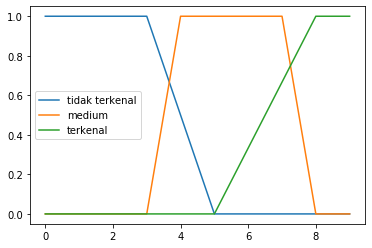

In [74]:
#fuzzyfikasi
#rule followes dan enggaments

#FOLLOWERS
def followerssedikit(data):
    if data < 30000:
        return 1
    elif data >= 50000:
        return 0
    else:
        return (50000-data)/(50000-30000)
    
def followersmedium(data):
    if data <= 30000 or data > 80000:
        return 0
    elif 45000 < data and data <=55000:
        return 1
    elif 30000 < data and data <= 45000:
        return ((data-30000)/(45000-30000))
    else:
        return ((80000-data)/(80000-55000))
    
def followerstinggi(data):
    if data <= 50000:
        return 0
    elif data >= 80000:
        return 1
    else:
        return ((data-50000)/(80000-50000))

# ENGGAGMENT
def engsedikit(data):
    if data < 3:
        return 1
    elif data >= 5:
        return 0
    else:
        return (5-data)/(5-3)

def engmedium(data):
    if data <= 3 or data >= 8 :
        return 0
    elif 4 < data and data <=7:
        return 1
    elif 3 < data and data <= 4:
        return ((data-3)/(4-3))
    else:
        return ((8-data)/(8-7))

def engbanyak(data):
    if data <= 5:
        return 0
    elif data >= 8:
        return 1
    else:
        return ((data-5)/(8-5))
    
# simulasi enggagment melihat plot
v = num.arange(0,10,1)
mat.plot(v, [engsedikit(it) for it in v], label="tidak terkenal")
mat.plot(v, [engmedium(it) for it in v], label="medium")
mat.plot(v, [engbanyak(it) for it in v], label="terkenal")
mat.legend()
    
# v = num.arange(0,100000,1)
# mat.plot(v, [followerssedikit(it) for it in v], label="sedikit")
# mat.plot(v, [followersmedium(it) for it in v], label="medium")
# mat.plot(v, [followerstinggi(it) for it in v], label="banyak")
# mat.legend()


In [40]:
#step 2: inference

data = read()

#membuat penyimpanan array
followers = []
eng = []
sementara = []
data1 = []
data2 = []

#data follower -> array followers
for i in range(len(data)):
    followers.append(data[i][1])
    
#data enggagment -> array enggagment
for j in range(len(data)):
    eng.append(float(data[j][2]))
    
print(followers)
print(' ')
print(eng)
print('')
print('=======================================================================================================================')

#klasifikasi followers
for x in range(len(followers)):
    sementara1 = followerssedikit(followers[x])
    sementara2 = followersmedium(followers[x])
    sementara3 = followerstinggi(followers[x])
    sementara.append(sementara1)
    sementara.append(sementara2)
    sementara.append(sementara3)
    data1.append(sementara)
    sementara = []
    sementara1 = []
    sementara2 = []
    sementara3 = []
    
print(data1)
print('-----------------------------------------------------------------------------------------------------------------------')
#klasifikasi eng

for k in range(len(eng)):
    sementara1 = engsedikit(eng[k])
    sementara2 = engmedium(eng[k])
    sementara3 = engbanyak(eng[k])
    sementara.append(sementara1)
    sementara.append(sementara2)
    sementara.append(sementara3)
    data2.append(sementara)
    sementara = []
    
print(data2)

[6207.0, 38237.0, 14840.0, 43851.0, 15530.0, 24050.0, 44837.0, 10029.0, 14531.0, 7862.0, 95117.0, 28548.0, 90773.0, 34711.0, 11546.0, 38046.0, 17006.0, 22159.0, 55217.0, 1908.0, 23555.0, 6463.0, 27915.0, 3628.0, 77585.0, 30010.0, 18404.0, 9828.0, 12108.0, 7643.0, 6517.0, 17289.0, 44833.0, 10953.0, 14910.0, 30419.0, 32406.0, 30308.0, 9890.0, 18403.0, 81909.0, 29689.0, 29843.0, 13129.0, 15165.0, 42111.0, 46847.0, 19925.0, 42391.0, 43475.0, 21126.0, 39504.0, 56257.0, 18921.0, 18570.0, 30940.0, 10645.0, 5655.0, 58987.0, 58403.0, 53701.0, 33443.0, 48553.0, 8585.0, 34471.0, 46833.0, 31642.0, 28320.0, 45718.0, 11602.0, 25160.0, 61456.0, 21216.0, 22394.0, 94551.0, 39175.0, 17408.0, 20226.0, 47405.0, 20406.0, 44116.0, 12098.0, 10614.0, 25712.0, 25346.0, 26515.0, 9043.0, 19602.0, 22801.0, 1526.0, 22100.0, 3837.0, 27657.0, 49646.0, 15523.0, 13436.0, 5741.0, 27417.0, 40869.0, 15788.0]
 
[1.0, 5.8, 0.6, 1.4, 3.5, 3.3, 1.3, 3.4, 0.2, 2.8, 6.6, 2.5, 6.7, 1.8, 2.4, 0.9, 0.9, 1.0, 4.9, 2.3, 0.8, 1.2, 2

In [44]:
#defuzzyfikasi

#rejected = 30
#considered = 60
#accepted = 100

score = []
array2 = []
fancy = []
array3 = []
low = 0
med = 1
high = 2
#mencari data dari followers & enggagment

#follrendah & engrendah
for j in range (len(followers)):
    if data1[j][low] < data2[j][low]:
        rejected = data1[j][low] * 30
        asset1 = data1[j][low]
    else:
        rejected = data2[j][low] * 30
        asset1 = data2[j][low]
        
#follrendah & engmed                
    if data1[j][low] < data2[j][med]:
        rejected = data1[j][low] * 30
        asset2 = data1[j][low]
    else:
        rejected = data2[j][med] * 30
        asset2 = data2[j][med]
        
#follrendah & engtinggi
    if data1[j][low] < data2[j][high]:
        considered = data1[j][low] * 60
        asset3 = data1[j][low]
    else:
        considered = data2[j][high] * 60
        asset3 = data2[j][high]

#follmed & engrendah
    if data1[j][med] < data2[j][low]:
        considered = data1[j][med] * 60
        asset4 = data1[j][med]
    else:
        considered = data2[j][low] * 60
        asset4 = data2[j][low]
        
#follmed & engmed
    if data1[j][med] < data2[j][med]:
        considered = data1[j][med] * 60
        asset5 = data1[j][med]
    else:
        considered = data2[j][med] * 60
        asset5 = data2[j][med]
        
#follmed & engtinggi
    if data1[j][med] < data2[j][high]:
        accepted = data1[j][med] * 100
        asset6 = data1[j][med]
    else:
        accepted = data2[j][high] * 100
        asset6 = data2[j][high]
    
#folltinggi & engrendah
    if data1[j][high] < data2[j][low]:
        considered = data1[j][high] * 60
        asset7 = data1[j][high]
    else:
        considered = data2[j][low] * 60
        asset7 = data2[j][low]
        
#folltinggi & engmed
    if data1[j][high] < data2[j][med]:
        considered = data1[j][high] * 60
        asset8 = data1[j][high]
    else:
        considered = data2[j][med] * 60
        asset8 = data2[j][med]

#folltinggi & enghigh
    if data1[j][high] < data2[j][high]:
        accepted = data1[j][high] * 100
        asset9 = data1[j][high]
    else:
        accepted = data2[j][high] * 100
        asset9 = data2[j][high]
        
    score.append(rejected)
    score.append(considered)
    score.append(accepted)
    fancy.append(asset1)
    fancy.append(asset2)
    fancy.append(asset3)
    fancy.append(asset4)
    fancy.append(asset5)
    fancy.append(asset6)
    fancy.append(asset7)
    fancy.append(asset8)
    fancy.append(asset9)
    array2.append(score)
    array3.append(fancy)
    score = []
    fancy = []
    
print (array2)
print ('**************------------***********************')
print (array3)
print ('**************------------***********************')

[[0, 0, 0], [17.644499999999997, 0, 0], [0, 0, 0], [0, 0, 0], [15.0, 0, 0], [8.999999999999995, 0, 0], [0, 0, 0], [11.999999999999996, 0, 0], [0, 0, 0], [0, 0, 0], [0, 60, 53.33333333333332], [0, 0, 0], [0, 60, 56.66666666666668], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 10.434, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [3.0000000000000027, 0, 0], [21.000000000000007, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [26.999999999999996, 0, 0], [0, 0, 0], [8.999999999999995, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 36.00000000000001, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [30, 0, 0], [0, 0, 0], [0, 0, 0], [3.0000000000000027, 0, 0], [0, 0, 0], [0, 12.00000000000001, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 17.974, 29.956666666666663], [0, 16.806, 6.666666666666672], [0, 7.402, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [11.9999999999999

In [50]:
plus = 0
plus2 = 0
arrplus = []
arrplus2 = []

#menambah data atas
for s in range(len(array2)):
    for h in range(3):
        plus = plus +array2[s][h]
    arrplus.append(plus)
    plus = 0
print(arrplus)
print('--------------------------------------------------------------')

#menambah data bawah
for t in range(len(array3)):
    for y in range(9):
        plus2 = plus2 + array3[t][y]
    arrplus2.append(plus2)
    plus2 = 0
print(arrplus2)

[0, 17.644499999999997, 0, 0, 15.0, 8.999999999999995, 0, 11.999999999999996, 0, 0, 113.33333333333331, 0, 116.66666666666669, 0, 0, 0, 0, 0, 10.434, 0, 0, 0, 0, 0, 0, 0, 3.0000000000000027, 21.000000000000007, 0, 0, 0, 0, 0, 26.999999999999996, 0, 8.999999999999995, 0, 0, 0, 0, 36.00000000000001, 0, 0, 0, 0, 0, 0, 30, 0, 0, 3.0000000000000027, 0, 12.00000000000001, 0, 0, 0, 0, 0, 47.93066666666667, 23.472666666666672, 7.402, 0, 0, 0, 0, 0, 11.999999999999996, 0, 0, 0, 0, 22.912000000000003, 0, 30, 0, 8.999999999999995, 0, 0, 0, 6.000000000000005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6.000000000000005, 0, 30, 0, 3.0000000000000027, 0, 0, 0, 0, 30]
--------------------------------------------------------------
[1, 1.6706166666666666, 1, 1.23085, 1.25, 1.15, 1.2472833333333333, 1.2, 1, 1, 1.5333333333333332, 1, 1.5666666666666669, 1.0785166666666666, 1, 1.1341, 1, 1, 1.2652199999999996, 1, 1, 1, 1, 1, 1.0161, 1.0001666666666666, 1.05, 1.35, 1, 1, 1, 1, 1.2472166666666666, 1.45, 1.0, 1.205866666

In [52]:
stay = 0
arrstay = []

#membagi data atas dan bawah
for u in range (100):
    stay = arrplus[u]/arrplus2[u]
    arrstay.append(stay)
    stay = 0
print('---------------------------------')
print(arrstay)

---------------------------------
[0.0, 10.561668844837733, 0.0, 0.0, 12.0, 7.826086956521735, 0.0, 9.999999999999998, 0.0, 0.0, 73.91304347826086, 0.0, 74.46808510638299, 0.0, 0.0, 0.0, 0.0, 0.0, 8.246787120026559, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8571428571428594, 15.555555555555559, 0.0, 0.0, 0.0, 0.0, 0.0, 18.620689655172413, 0.0, 7.46351172047766, 0.0, 0.0, 0.0, 0.0, 27.692307692307697, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 2.8571428571428594, 0.0, 7.954570563669715, 0.0, 0.0, 0.0, 0.0, 0.0, 23.889841434400626, 18.376592535373728, 4.94543672887622, 0.0, 0.0, 0.0, 0.0, 0.0, 8.457056944183423, 0.0, 0.0, 0.0, 0.0, 15.037804536544385, 0.0, 20.930232558139533, 0.0, 5.134299976230091, 0.0, 0.0, 0.0, 5.454545454545459, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.454545454545459, 0.0, 25.71428571428571, 0.0, 2.8571428571428594, 0.0, 0.0, 0.0, 0.0, 18.75]


In [59]:
akhiran = []
akhir = []
# memberikan id pada hasil rumus sugeno
for u in range(len(arrstay)):
    sementara1 = u+1
    sementara2 = arrstay[u]
    akhiran.append(sementara1)
    akhiran.append(sementara2)
    akhir.append(akhiran)
    akhiran = []

print(akhir)

[[1, 0.0], [2, 10.561668844837733], [3, 0.0], [4, 0.0], [5, 12.0], [6, 7.826086956521735], [7, 0.0], [8, 9.999999999999998], [9, 0.0], [10, 0.0], [11, 73.91304347826086], [12, 0.0], [13, 74.46808510638299], [14, 0.0], [15, 0.0], [16, 0.0], [17, 0.0], [18, 0.0], [19, 8.246787120026559], [20, 0.0], [21, 0.0], [22, 0.0], [23, 0.0], [24, 0.0], [25, 0.0], [26, 0.0], [27, 2.8571428571428594], [28, 15.555555555555559], [29, 0.0], [30, 0.0], [31, 0.0], [32, 0.0], [33, 0.0], [34, 18.620689655172413], [35, 0.0], [36, 7.46351172047766], [37, 0.0], [38, 0.0], [39, 0.0], [40, 0.0], [41, 27.692307692307697], [42, 0.0], [43, 0.0], [44, 0.0], [45, 0.0], [46, 0.0], [47, 0.0], [48, 20.0], [49, 0.0], [50, 0.0], [51, 2.8571428571428594], [52, 0.0], [53, 7.954570563669715], [54, 0.0], [55, 0.0], [56, 0.0], [57, 0.0], [58, 0.0], [59, 23.889841434400626], [60, 18.376592535373728], [61, 4.94543672887622], [62, 0.0], [63, 0.0], [64, 0.0], [65, 0.0], [66, 0.0], [67, 8.457056944183423], [68, 0.0], [69, 0.0], [70

In [62]:
# sorting array desc berdasarkan score
def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[1], reverse = True) 
    return sub_li 
  
# Driver Code 
sub_li = akhir
yiha = Sort(sub_li) 
# print(yiha)

In [75]:
# import data ke csv fuzzytop20
import csv
itzy = []
ace = []
ahha = []
for y in range(len(yiha)):
    yiha[y][0] = float(yiha[y][0])
#     print(yiha[y][0])

for i in range(20):
    for t in range(len(data)):
        if yiha[i][0] == data[t][0]:
            itzy.append(data[t])

            
for k in range(len(itzy)):
    tmp1 = float(itzy[k][0])
    tmp2 = float(itzy[k][1])
    tmp3 = float(itzy[k][2])
    tmp4 = float(yiha[k][1])
    ace.append(tmp1)
    ace.append(tmp2)
    ace.append(tmp3)
    ace.append(tmp4)
    ahha.append(ace)
    ace = []
    
count = 0
with open('FINALSCORE.csv','w', newline='') as csvfile:
    fieldnames = [' ','ID','FOLLOWERS','ENGGAGMENT','SCORE']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    
    for t in range(len(ahha)):
        count += 1
        thewriter.writerow({' ':count, 'ID':ahha[t][0], 'FOLLOWERS':ahha[t][1],'ENGGAGMENT':ahha[t][2], 'SCORE':ahha[t][3]})
